In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.11.0+cu113 True


In [ ]:
# Install MMCV
# 런타임 -> 런타임 "다시 시작" 후 아래 수행. 
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 46.6 MB 3.1 MB/s 
     |████████████████████████████████| 190 kB 5.0 MB/s 


### Transform Train png to contoured png

In [ ]:
import mmcv
import matplotlib.pyplot as plt
import os.path as osp
import numpy as np
from PIL import Image
import cv2

# convert dataset annotation to semantic segmentation map
data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road'
#img_dir = 'train'
ann_dir = 'annotation'
fuck_dir = 'contoured_wo10'

# define class and plaette for better visualization
classes = ('background', 'road', 'contours')
palette = [[0, 0, 0], [255, 255, 255], [255, 0, 0]]

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow

def draw_contour(where_to_find_dir,masked_txt):
  # load png to convert
  masked_png = cv2.imread(where_to_find_dir,0)
  # gray = cv2.cvtColor(masked_png, cv2.COLOR_BGR2GRAY)

  # # use morphology to fill tiny empty spots 
  (thresh, binary_png) = cv2.threshold(masked_png, 100, 1, cv2.THRESH_BINARY)

  # kernel = np.ones((2,2),np.uint8)
  # opening = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel, iterations = 1)

  # sure_bg = cv2.dilate(opening,kernel,iterations=3)


  # find contours through out the png file and draw them on that png 
  contours,hierarchy = cv2.findContours(binary_png,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  contoured_png = cv2.drawContours(masked_txt,contours,-1,2,5,cv2.LINE_8)

  # convert contoured png to contoured txt
  contoured_txt = contoured_png.astype(int)

  return contoured_txt

In [ ]:
for file in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.png'):
  masked_txt = (np.loadtxt(osp.join(data_root,ann_dir,file.replace('.png','.txt')))).astype(np.uint8)

  contoured_txt = draw_contour(osp.join(data_root,ann_dir,file),masked_txt)
  # save contoured txt
  np.savetxt(osp.join(data_root,fuck_dir,file.replace('.png','.txt')),contoured_txt,fmt = '%d', delimiter = ' ')
  fuckfuckfuck = Image.fromarray(contoured_txt.astype(np.uint8)).convert('P')
  fuckfuckfuck.putpalette(np.array(palette,dtype=np.uint8))

  # save contoured png in already set pallete 
  fuckfuckfuck.save(osp.join(data_root,fuck_dir,file))
  print(osp.join(data_root,fuck_dir,file))
  # cv2.imwrite(osp.join(data_root,fuck_dir,file.replace('.txt','.png')),contoured_png)

/content/drive/Shareddrives/msmg/level1/dataset/train/road/contoured_wo10/BLD02066_PS3_K3A_NIA0374.png
/content/drive/Shareddrives/msmg/level1/dataset/train/road/contoured_wo10/BLD02068_PS3_K3A_NIA0374.png
/content/drive/Shareddrives/msmg/level1/dataset/train/road/contoured_wo10/BLD02069_PS3_K3A_NIA0374.png
/content/drive/Shareddrives/msmg/level1/dataset/train/road/contoured_wo10/BLD02070_PS3_K3A_NIA0374.png
/content/drive/Shareddrives/msmg/level1/dataset/train/road/contoured_wo10/BLD02072_PS3_K3A_NIA0374.png
/content/drive/Shareddrives/msmg/level1/dataset/train/road/contoured_wo10/BLD02103_PS3_K3A_NIA0374.png
/content/drive/Shareddrives/msmg/level1/dataset/train/road/contoured_wo10/BLD02113_PS3_K3A_NIA0374.png
/content/drive/Shareddrives/msmg/level1/dataset/train/road/contoured_wo10/BLD02115_PS3_K3A_NIA0374.png
/content/drive/Shareddrives/msmg/level1/dataset/train/road/contoured_wo10/BLD02116_PS3_K3A_NIA0374.png
/content/drive/Shareddrives/msmg/level1/dataset/train/road/contoured_wo10

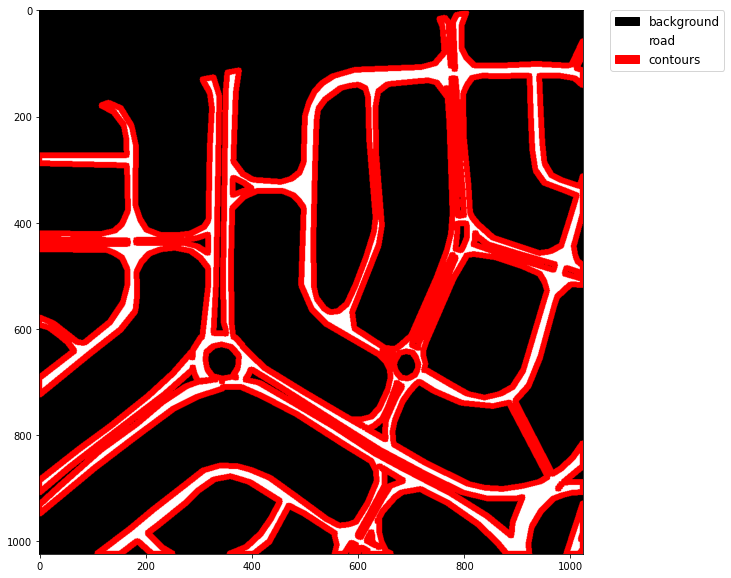

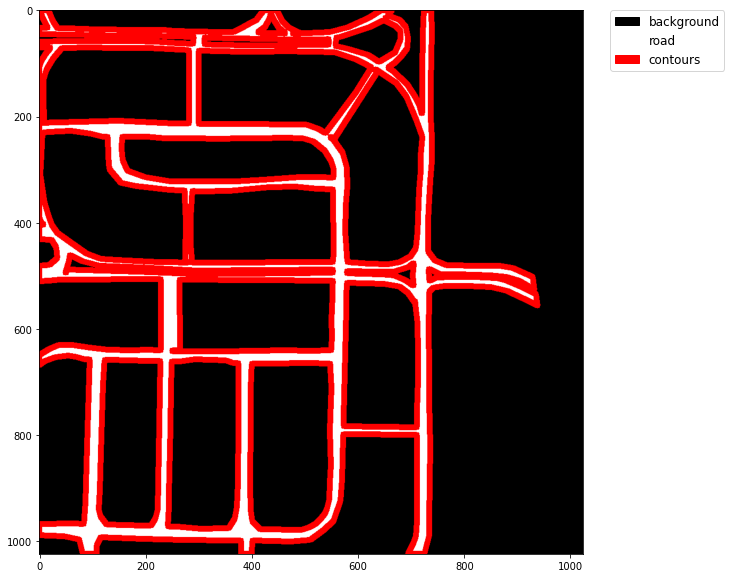

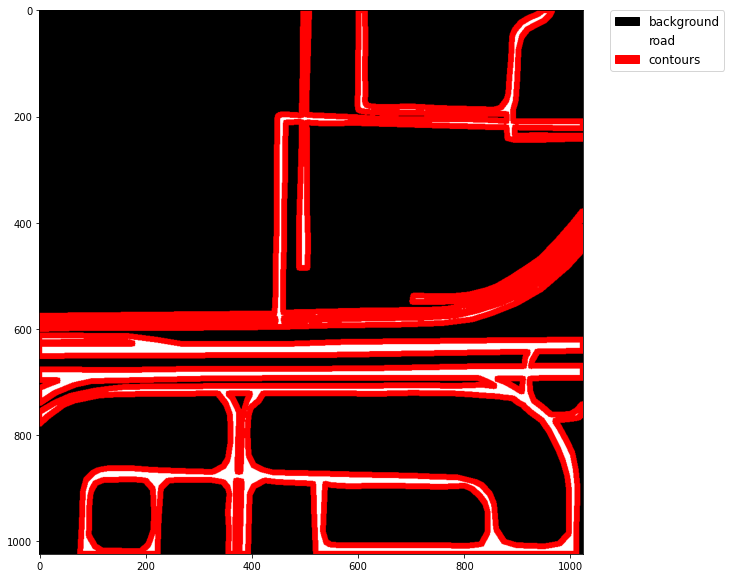

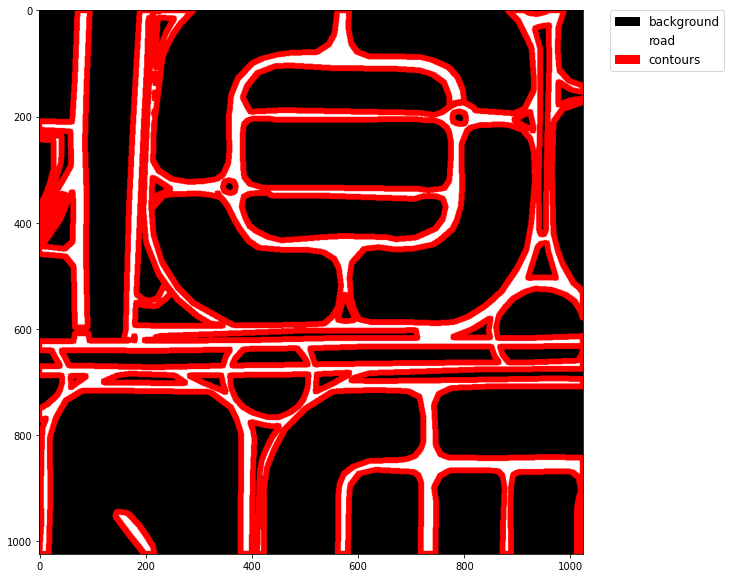

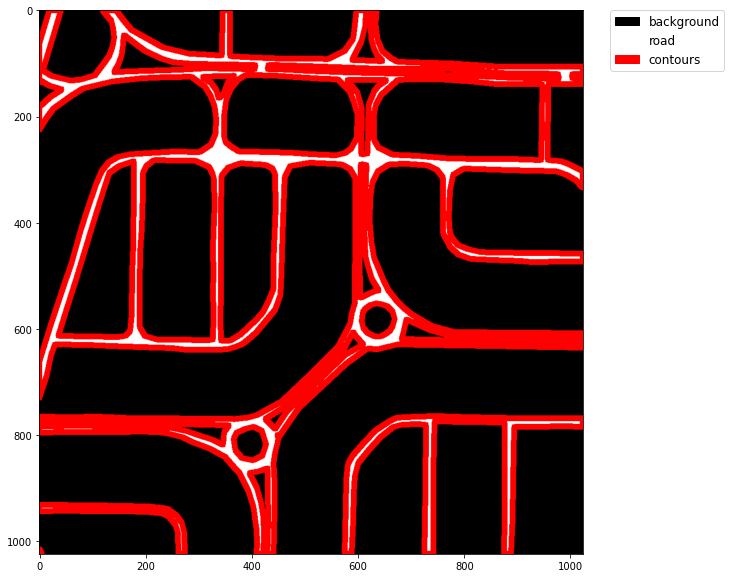

In [ ]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
imlist = [1,3,6,7,9]
for i in imlist:
  img = Image.open('/content/drive/Shareddrives/msmg/level1/dataset/train/road/contoured_wo10/BLD0000{}_PS3_K3A_NIA0276.png'.format(i))
  plt.figure(figsize=(10, 10))
  im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
  patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(3)]

# put those patched as legend-handles into the legend
  plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')

plt.show()

In [ ]:
mt = np.loadtxt(osp.join(data_root,fuck_dir,'BLD00001_PS3_K3A_NIA0276.txt')).astype(np.uint8)

In [ ]:
mt = np.array(mt)

In [ ]:
mt.shape

(1024, 1024)

In [ ]:
np.unique(mt)

array([0, 1, 2], dtype=uint8)

In [ ]:
mt[mt== 0].shape

(737660,)

In [ ]:
mt[mt== 1].shape

(77615,)

In [ ]:
mt[mt== 2].shape

(233301,)

#### 디렉토리 내 파일 개수 ( png 1144 + txt 1144)

In [ ]:
import os
initial_count = 0
dir = '/content/drive/Shareddrives/msmg/level1/dataset/train/road/contoured_wo10'
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print(initial_count)

2288


### Transform Validation png to contoured png

In [ ]:
# convert dataset annotation to semantic segmentation map
data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road'
#img_dir = 'train'
ann_dir = 'annotation'
fuck_dir = 'contoured_wo5'

In [ ]:
for file in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.png'):
  masked_txt = (np.loadtxt(osp.join(data_root,ann_dir,file.replace('.png','.txt')))).astype(np.uint8)

  contoured_txt = draw_contour(osp.join(data_root,ann_dir,file),masked_txt)
  # save contoured txt
  np.savetxt(osp.join(data_root,fuck_dir,file.replace('.png','.txt')),contoured_txt,fmt = '%d', delimiter = ' ')
  fuckfuckfuck = Image.fromarray(contoured_txt.astype(np.uint8)).convert('P')
  fuckfuckfuck.putpalette(np.array(palette,dtype=np.uint8))

  # save contoured png in already set pallete 
  fuckfuckfuck.save(osp.join(data_root,fuck_dir,file))
  print(osp.join(data_root,fuck_dir,file))
  # cv2.imwrite(osp.join(data_root,fuck_dir,file.replace('.txt','.png')),contoured_png)

/content/drive/Shareddrives/msmg/level1/dataset/validation/road/contoured_wo5/BLD00002_PS3_K3A_NIA0276.png
/content/drive/Shareddrives/msmg/level1/dataset/validation/road/contoured_wo5/BLD00010_PS3_K3A_NIA0276.png
/content/drive/Shareddrives/msmg/level1/dataset/validation/road/contoured_wo5/BLD00029_PS3_K3A_NIA0276.png
/content/drive/Shareddrives/msmg/level1/dataset/validation/road/contoured_wo5/BLD00047_PS3_K3A_NIA0276.png
/content/drive/Shareddrives/msmg/level1/dataset/validation/road/contoured_wo5/BLD00072_PS3_K3A_NIA0276.png
/content/drive/Shareddrives/msmg/level1/dataset/validation/road/contoured_wo5/BLD00086_PS3_K3A_NIA0276.png
/content/drive/Shareddrives/msmg/level1/dataset/validation/road/contoured_wo5/BLD00097_PS3_K3A_NIA0276.png
/content/drive/Shareddrives/msmg/level1/dataset/validation/road/contoured_wo5/BLD00092_PS3_K3A_NIA0276.png
/content/drive/Shareddrives/msmg/level1/dataset/validation/road/contoured_wo5/BLD00119_PS3_K3A_NIA0276.png
/content/drive/Shareddrives/msmg/leve

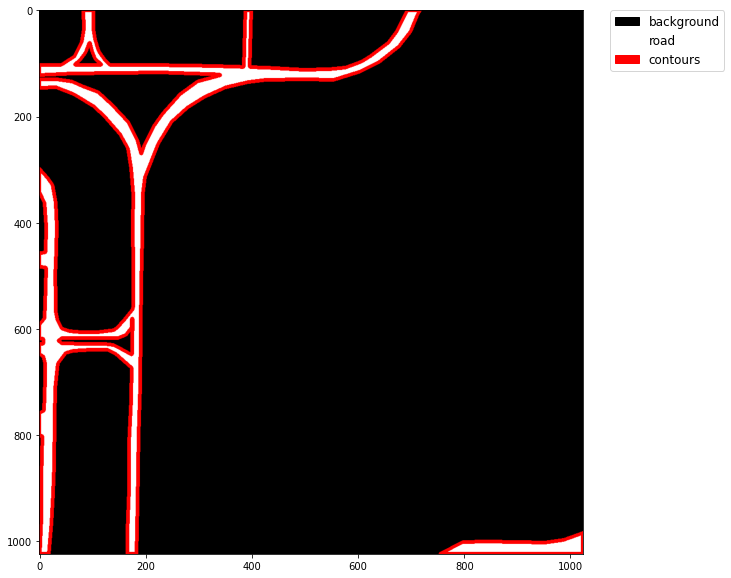

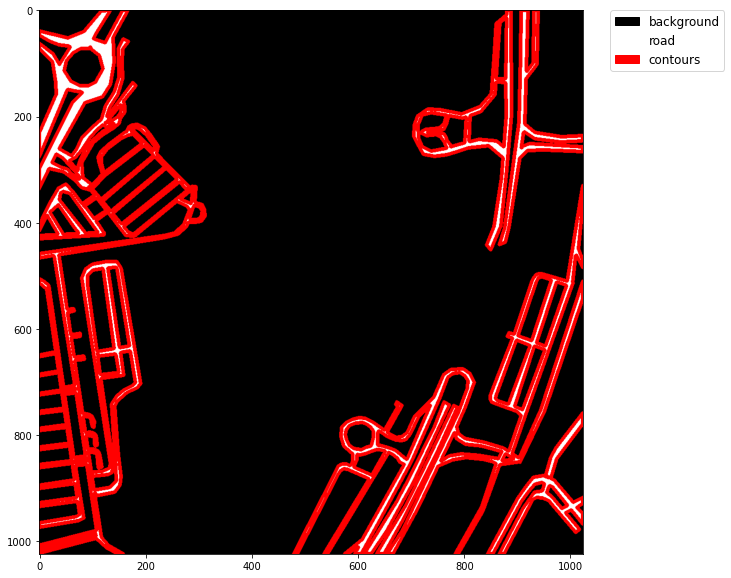

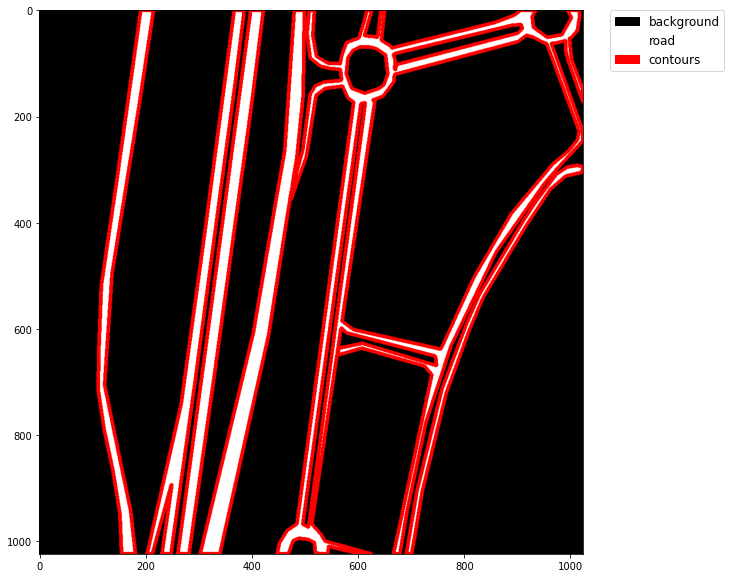

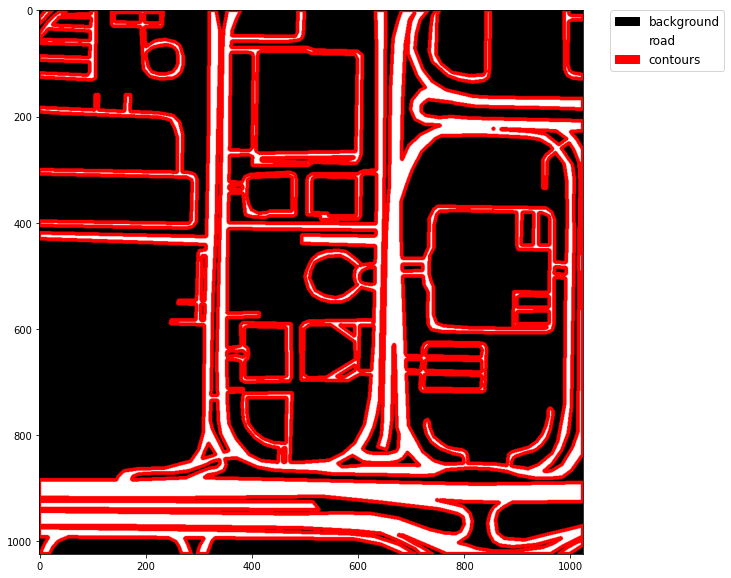

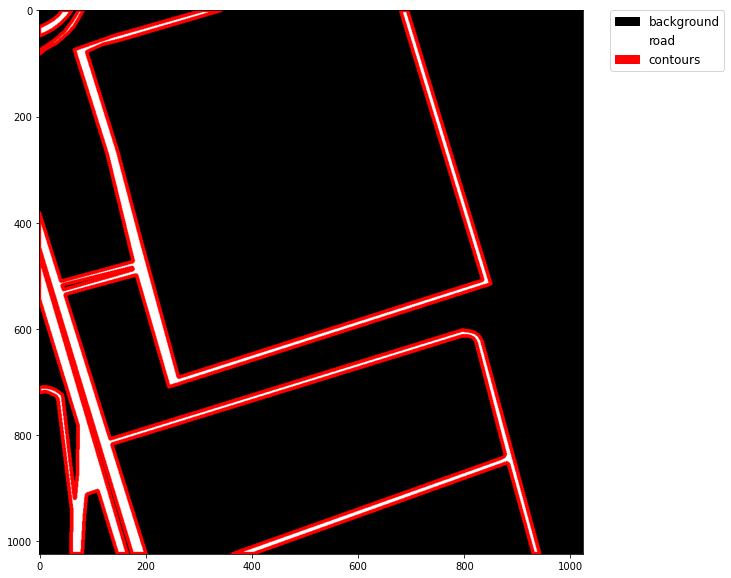

In [ ]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
imlist = [10,29,47,72,86]
for i in imlist:
  img = Image.open('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/contoured_wo5/BLD000{}_PS3_K3A_NIA0276.png'.format(i))
  plt.figure(figsize=(10, 10))
  im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
  patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(3)]

# put those patched as legend-handles into the legend
  plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')

plt.show()

In [ ]:
mt = np.loadtxt(osp.join(data_root,fuck_dir,'BLD00002_PS3_K3A_NIA0276.txt')).astype(np.uint8)

In [ ]:
mt = np.array(mt)

In [ ]:
mt.shape

(1024, 1024)

In [ ]:
np.unique(mt)

array([0, 1, 2], dtype=uint8)

In [ ]:
mt[mt== 0].shape

(716317,)

In [ ]:
mt[mt== 1].shape

(149467,)

In [ ]:
mt[mt== 2].shape

In [ ]:
import os
initial_count = 0
dir = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road/contoured_wo5'
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print(initial_count)

254
